In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.layers import Masking
from tensorflow.keras.models import Sequential

In [75]:
# Data Frame

Indicators_frame = {'Gov. response' : ['x','x','x','x','x','x','x','x','x','x','x','x','x','x','x','x'],
                    'Containment and health' : ['x','x','x','x','x','x','x','x','-','-','x','x','x','x','x','x'],
                    'Stringency' : ['x','x','x','x','x','x','x','x','-','-','x','-','-','-','-','-'],
                    'Economic support' : ['-','-','-','-','-','-','-','-','x','x','-','-','-','-','-','-'],
                    'Indicators': ['c1','c2','c3','c4','c5','c6','c7','c8','e1','e2','h1','h2','h3','h6','h7','h8'],
                    'Indicator Meaning': ['School_closing',
                                        'Workplace closing',
                                        'Cancel public events',
                                        'Restrictions on gatherings',
                                        'Close public transport',
                                        'Stay at home requirements',
                                        'Restrictions on internal movement',
                                        'International travel controls',
                                        'Income support',
                                        'Debt/contract relief',
                                        'Public information campaigns',
                                        'Testing policy',
                                        'Contact tracing',
                                        'Facial coverings',
                                        'Vaccination policy',
                                        'Protection of elderly people'],
                    'Max. value (Nj)' : ['3 (0, 1, 2, 3)','3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)','2 (0, 1, 2)',
                                    '3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)','2 (0, 1, 2)','2 (0, 1, 2)',
                                    '2 (0, 1, 2)','3 (0, 1, 2, 3)','2 (0, 1, 2)','4 (0, 1, 2, 3, 4)',
                                    '5 (0, 1, 2, 3, 4, 5)','3 (0, 1, 2, 3)']
}

In [76]:
Indicators_frame = pd.DataFrame(Indicators_frame)
Indicators_frame

,Gov. response,Containment and health,Stringency,Economic support,Indicators,Indicator Meaning,Max. value (Nj)
0,x,x,x,-,c1,School_closing,"3 (0, 1, 2, 3)"
1,x,x,x,-,c2,Workplace closing,"3 (0, 1, 2, 3)"
2,x,x,x,-,c3,Cancel public events,"2 (0, 1, 2)"
3,x,x,x,-,c4,Restrictions on gatherings,"4 (0, 1, 2, 3, 4)"
4,x,x,x,-,c5,Close public transport,"2 (0, 1, 2)"
5,x,x,x,-,c6,Stay at home requirements,"3 (0, 1, 2, 3)"
6,x,x,x,-,c7,Restrictions on internal movement,"2 (0, 1, 2)"
7,x,x,x,-,c8,International travel controls,"4 (0, 1, 2, 3, 4)"
8,x,-,-,x,e1,Income support,"2 (0, 1, 2)"
9,x,-,-,x,e2,Debt/contract relief,"2 (0, 1, 2)"


In [77]:
# Vacination Dataset
url_vaccination = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'
url_ages = 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-age-group.csv'


In [78]:
# Index URLs
url_index_strigency = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/stringency_index_avg.csv'
url_index_gov_response = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/government_response_index_avg.csv'
url_index_health = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/containment_health_index_avg.csv'
url_index_economic = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/economic_support_index.csv'

# Indicators URLs
# C sub-indicators
url_c1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c1m_school_closing.csv'
url_c2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c2m_workplace_closing.csv'
url_c3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c3m_cancel_public_events.csv'
url_c4 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c4m_restrictions_on_gatherings.csv'
url_c5 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c5m_close_public_transport.csv'
url_c6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c6m_stay_at_home_requirements.csv'
url_c7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c7m_movementrestrictions.csv'
url_c8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/c8ev_internationaltravel.csv'

# E sub-indicators
url_e1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e1_income_support.csv'
url_e2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/e2_debtrelief.csv'

# H sub-indicators
url_h1 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h1_public_information_campaigns.csv'
url_h2 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h2_testing_policy.csv'
url_h3 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h3_contact_tracing.csv'
url_h6 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h6m_facial_coverings.csv'
url_h7 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h7_vaccination_policy.csv'
url_h8 = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/h8m_protection_of_elderly_ppl.csv'

# Target URLs
url_cases = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_cases.csv'
url_deaths = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/timeseries/confirmed_deaths.csv'

In [79]:
# DataFrame Index
df_strigency_raw = pd.read_csv(url_index_strigency)
df_gov_response_raw = pd.read_csv(url_index_gov_response)
df_health_raw = pd.read_csv(url_index_health)
df_economic_raw = pd.read_csv(url_index_economic)

In [80]:
# DataFrames Indicator
df_c1_raw = pd.read_csv(url_c1)
df_c2_raw = pd.read_csv(url_c2)
df_c3_raw = pd.read_csv(url_c3)
df_c4_raw = pd.read_csv(url_c4)
df_c5_raw = pd.read_csv(url_c5)
df_c6_raw = pd.read_csv(url_c6)
df_c7_raw = pd.read_csv(url_c7)
df_c8_raw = pd.read_csv(url_c8)

df_e1_raw = pd.read_csv(url_e1)
df_e2_raw = pd.read_csv(url_e2)

df_h1_raw = pd.read_csv(url_h1)
df_h2_raw = pd.read_csv(url_h2)
df_h3_raw = pd.read_csv(url_h3)
df_h6_raw = pd.read_csv(url_h6)
df_h7_raw = pd.read_csv(url_h7)
df_h8_raw = pd.read_csv(url_h8)

In [81]:
# Data Frame target
df_cases_raw = pd.read_csv(url_cases)
df_deaths_raw = pd.read_csv(url_deaths)

In [82]:
# Vaccination
df_vaccination_raw = pd.read_csv(url_vaccination)
df_ages_raw = pd.read_csv(url_ages)

In [83]:
# Cleaninng Index Features

drop_columns = ['Unnamed: 0','country_code','region_code','region_name','jurisdiction']

df_gov_response = df_gov_response_raw.drop(columns = drop_columns)
df_gov_response.set_index(keys='country_name', inplace=True)
df_gov_response = df_gov_response.T
df_gov_response = df_gov_response.fillna(0)

df_health = df_health_raw.drop(columns = drop_columns)
df_health.set_index(keys='country_name', inplace=True)
df_health = df_health.T
df_health = df_health.fillna(0)

df_strigency = df_strigency_raw.drop(columns = drop_columns)
df_strigency.set_index(keys='country_name', inplace=True)
df_strigency = df_strigency.T
df_strigency = df_strigency.fillna(0)

df_economic = df_economic_raw.drop(columns = drop_columns)
df_economic.set_index(keys='country_name', inplace=True)
df_economic = df_economic.T
df_economic = df_economic.fillna(0)

In [84]:
df_c1 = df_c1_raw.copy()
df_c1 = df_c1.drop(columns = drop_columns)
df_c1.set_index(keys='country_name', inplace=True)
df_c1 = df_c1.T

df_c2 = df_c2_raw.copy()
df_c2 = df_c2.drop(columns = drop_columns)
df_c2.set_index(keys='country_name', inplace=True)
df_c2 = df_c2.T

df_c3 = df_c3_raw.copy()
df_c3 = df_c3.drop(columns = drop_columns)
df_c3.set_index(keys='country_name', inplace=True)
df_c3 = df_c3.T

df_c4 = df_c4_raw.copy()
df_c4 = df_c4.drop(columns = drop_columns)
df_c4.set_index(keys='country_name', inplace=True)
df_c4 = df_c4.T

df_c5 = df_c5_raw.copy()
df_c5 = df_c5.drop(columns = drop_columns)
df_c5.set_index(keys='country_name', inplace=True)
df_c5 = df_c5.T

df_c6 = df_c6_raw.copy()
df_c6 = df_c6.drop(columns = drop_columns)
df_c6.set_index(keys='country_name', inplace=True)
df_c6 = df_c6.T

df_c7 = df_c7_raw.copy()
df_c7 = df_c7.drop(columns = drop_columns)
df_c7.set_index(keys='country_name', inplace=True)
df_c7 = df_c7.T

df_c8 = df_c8_raw.copy()
df_c8 = df_c8.drop(columns = drop_columns)
df_c8.set_index(keys='country_name', inplace=True)
df_c8 = df_c8.T

df_e1 = df_e1_raw.copy()
df_e1 = df_e1.drop(columns = drop_columns)
df_e1.set_index(keys='country_name', inplace=True)
df_e1 = df_e1.T

df_e2 = df_e2_raw.copy()
df_e2 = df_e2.drop(columns = drop_columns)
df_e2.set_index(keys='country_name', inplace=True)
df_e2 = df_e2.T

df_h1 = df_h1_raw.copy()
df_h1 = df_h1.drop(columns = drop_columns)
df_h1.set_index(keys='country_name', inplace=True)
df_h1 = df_h1.T

df_h2 = df_h2_raw.copy()
df_h2 = df_h2.drop(columns = drop_columns)
df_h2.set_index(keys='country_name', inplace=True)
df_h2 = df_h2.T

df_h3 = df_h3_raw.copy()
df_h3 = df_h3.drop(columns = drop_columns)
df_h3.set_index(keys='country_name', inplace=True)
df_h3 = df_h3.T

df_h6 = df_h6_raw.copy()
df_h6 = df_h6.drop(columns = drop_columns)
df_h6.set_index(keys='country_name', inplace=True)
df_h6 = df_h6.T

df_h7 = df_h7_raw.copy()
df_h7 = df_h7.drop(columns = drop_columns)
df_h7.set_index(keys='country_name', inplace=True)
df_h7 = df_h7.T

df_h8 = df_h8_raw.copy()
df_h8 = df_h8.drop(columns = drop_columns)
df_h8.set_index(keys='country_name', inplace=True)
df_h8 = df_h8.T

In [85]:
# Cleaning Vaccination Features
df_vaccination = df_vaccination_raw.copy()
df_vaccination = df_vaccination[['date','location','people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred']]

In [86]:
# Cleaninng Target

# Cases per country
df_cases = df_cases_raw.drop(columns = drop_columns)
df_cases.set_index(keys='country_name', inplace=True)
df_cases = df_cases.T
df_cases = df_cases.fillna(0)

# Deaths per country
df_deaths = df_deaths_raw.drop(columns = drop_columns)
df_deaths.set_index(keys='country_name', inplace=True)
df_deaths = df_deaths.T
df_deaths = df_deaths.fillna(0)

In [87]:
country = 'India'

def country_output(country):
    
    # INDEX FEATURES
    country_index = df_gov_response.copy()
    country_index = country_index[[country]]
    country_index.index.name = country
    country_index.columns = ['gov_response']
    country_index['containment_and_health'] = df_health[[country]]
    country_index['stringency'] = df_strigency[[country]]
    country_index['economics_sup'] = df_economic[[country]]
    
    # INDICATOR FEATRUES
    df = df_c1[[country]].rename(columns = {country:'school_closing'})
    df.index.name = country
    df['workplace_closing'] = df_c2[[country]]
    df['cancel_public_events'] = df_c3[[country]]
    df['restrictions_on_gatherings'] = df_c4[[country]]
    df['close_public_transport'] = df_c5[[country]]
    df['stay_at_home_requirements'] = df_c6[[country]]
    df['restrictions_on_internal_movement'] = df_c7[[country]]
    df['international_travel_controls'] = df_c8[[country]]
    df['income_support'] = df_e1[[country]]
    df['debt/contract_relief'] = df_e2[[country]]
    df['public_information_campaigns'] = df_h1[[country]]
    df['testing_policy'] = df_h2[[country]]
    df['contact_tracing'] = df_h3[[country]]
    df['facial_coverings'] = df_h6[[country]]
    df['vaccination_policy'] = df_h7[[country]]
    df['protection_of_elderly_people'] = df_h8[[country]]
    df = df.fillna(method = 'ffill')
    country_indicator = df

    # POPULATION VACCINATED

    country_vaccination = df_vaccination.loc[df_vaccination['location']==country]
    country_vaccination = country_vaccination.fillna(method='ffill').drop(columns = 'location')
    country_vaccination.index.name = country
    country_vaccination = country_vaccination.fillna(0)

    # TARGET

    country_target = df_cases.copy()
    country_target = country_target[[country]]
    country_target.index.name = country
    country_target.columns = ['total_cases']
    country_target['new_cases'] = country_target - country_target.shift(1)
    country_target['total_deaths'] = df_deaths[[country]]
    country_target['new_deaths'] = df_deaths[[country]] - df_deaths[[country]].shift(1)

    country_target['new_cases'].loc[country_target['new_cases'] < 0] = 0
    country_target['new_deaths'].loc[country_target['new_deaths'] < 0] = 0

    # Days no update counter

    def non_uptade(country_target):

        counter = 0
        x = 1
        while country_target['total_deaths'][-x] == 0:
            counter += 1
            x += 1

        return counter

    counter = non_uptade(country_target)

    # Last Update Data
    country_index = country_index[15:-counter]
    country_indicator = country_indicator[15:-counter]
    country_vaccination = country_vaccination[15:-counter]
    country_target = country_target[15:-counter]
    
    # JOIN INDEX-TARGET AND INDICATOR-TARGET
    country_index = country_index.join(country_target)
    
    country_indicator = country_indicator.join(country_target)
    
    # JOIN INDEX AND VACCINATION
    country_vaccination.reset_index(inplace=True)
    country_vaccination['date'] = pd.to_datetime(country_vaccination['date'])

    country_index.reset_index(inplace=True)
    country_index[country] = country_index[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))
    
    country_index.rename(columns = {country: 'date'}, inplace = True)
    country_index = country_index.merge(country_vaccination, how = 'left' , on = 'date')

    country_index.fillna(method = 'ffill', inplace=True)
    country_index.fillna(0, inplace=True)
    country_index.drop(columns = country, inplace=True)
    
    # JOIN INDICATOR AND VACCINATION

    country_indicator.reset_index(inplace=True)
    country_indicator[country] = country_indicator[country].apply(lambda x: pd.to_datetime( x, format='%y%b%d', infer_datetime_format=True))

    country_indicator.rename(columns = {country: 'date'}, inplace = True)
    country_indicator = country_indicator.merge(country_vaccination, how = 'left' , on = 'date')

    country_indicator.fillna(method = 'ffill', inplace=True)
    country_indicator.fillna(0, inplace=True)
    country_indicator.drop(columns = country, inplace=True)
    
    return country_index, country_indicator

country_index, country_indicator = country_output(country)

In [88]:
country_index

,date,gov_response,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-01-16,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,2020-01-17,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,2020-01-18,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,2020-01-19,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,2020-01-20,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
963,2022-09-05,40.36,46.13,37.04,0.0,44466862.0,4417.0,528030.0,23.0,72.81,67.04,11.87
964,2022-09-06,40.36,46.13,37.04,0.0,44469661.0,2799.0,528057.0,27.0,72.82,67.05,12.00
965,2022-09-07,40.36,0.00,0.00,0.0,44478636.0,8975.0,528090.0,33.0,72.82,67.06,12.13
966,2022-09-08,40.36,0.00,0.00,0.0,44484729.0,6093.0,528121.0,31.0,72.83,67.08,12.35


In [89]:
country_indicator

,date,school_closing,workplace_closing,cancel_public_events,restrictions_on_gatherings,close_public_transport,stay_at_home_requirements,restrictions_on_internal_movement,international_travel_controls,income_support,...,facial_coverings,vaccination_policy,protection_of_elderly_people,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred
0,2020-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
1,2020-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
2,2020-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
3,2020-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
4,2020-01-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,2022-09-05,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,...,3.0,5.0,0.0,44466862.0,4417.0,528030.0,23.0,72.81,67.04,11.87
964,2022-09-06,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,...,3.0,5.0,0.0,44469661.0,2799.0,528057.0,27.0,72.82,67.05,12.00
965,2022-09-07,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,...,3.0,5.0,0.0,44478636.0,8975.0,528090.0,33.0,72.82,67.06,12.13
966,2022-09-08,0.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,...,3.0,5.0,0.0,44484729.0,6093.0,528121.0,31.0,72.83,67.08,12.35


In [90]:
for idx,column in enumerate(country_indicator.columns):
    print(idx,column)

0 date
1 school_closing
2 workplace_closing
3 cancel_public_events
4 restrictions_on_gatherings
5 close_public_transport
6 stay_at_home_requirements
7 restrictions_on_internal_movement
8 international_travel_controls
9 income_support
10 debt/contract_relief
11 public_information_campaigns
12 testing_policy
13 contact_tracing
14 facial_coverings
15 vaccination_policy
16 protection_of_elderly_people
17 total_cases
18 new_cases
19 total_deaths
20 new_deaths
21 people_vaccinated_per_hundred
22 people_fully_vaccinated_per_hundred
23 total_boosters_per_hundred


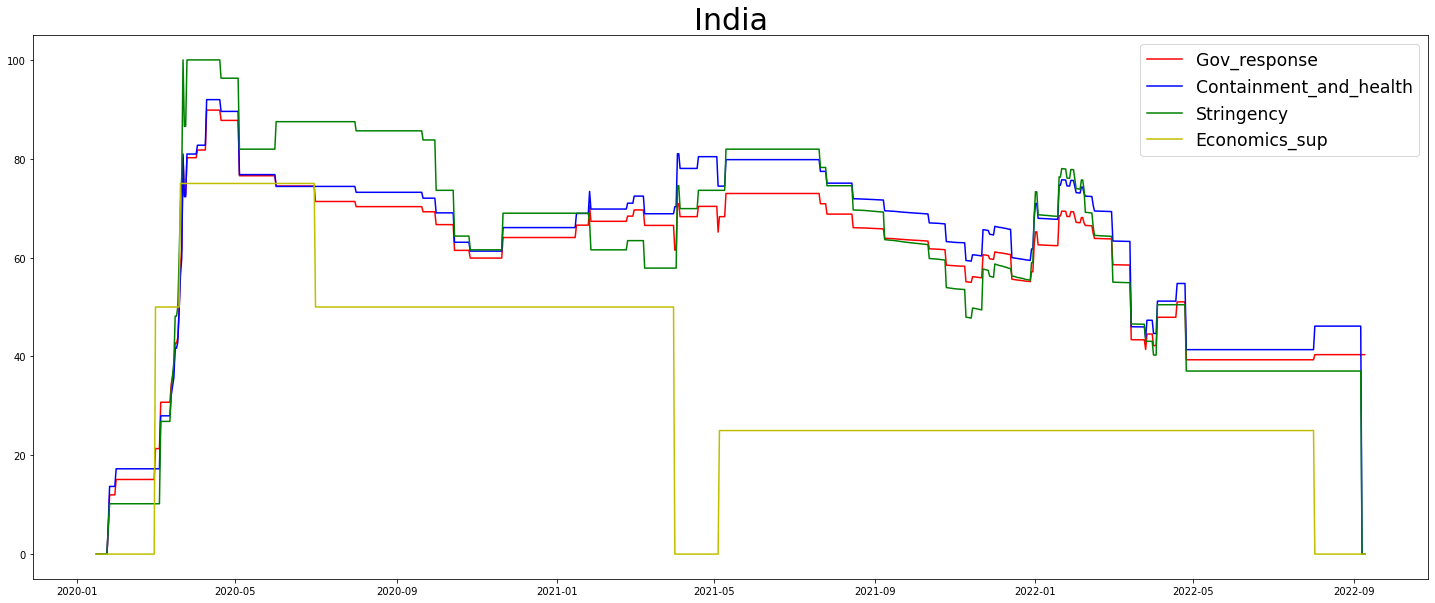

In [91]:
# Visualization Indexs
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['gov_response']], color = 'r')
plt.plot(x, country_index[['containment_and_health']], color = 'b')
plt.plot(x, country_index[['stringency']], color = 'g')
plt.plot(x, country_index[['economics_sup']], color = 'y')
plt.title(country, fontsize=30)
plt.legend(['Gov_response','Containment_and_health','Stringency','Economics_sup'], fontsize='xx-large');

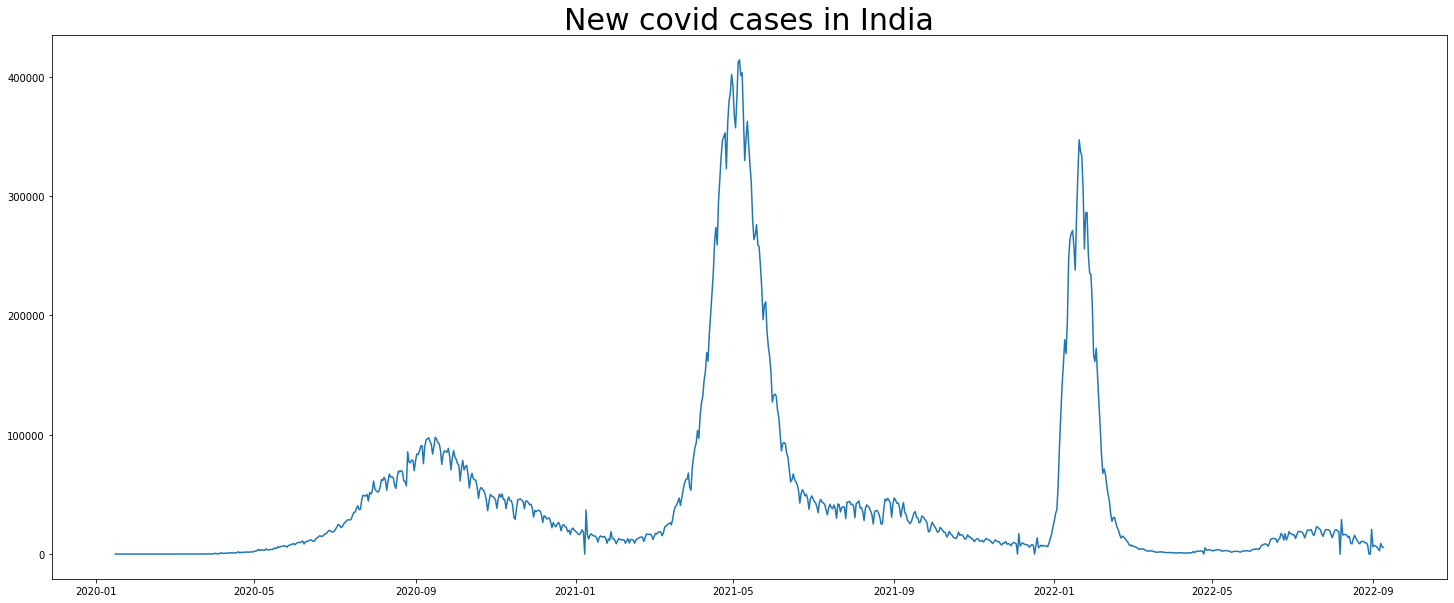

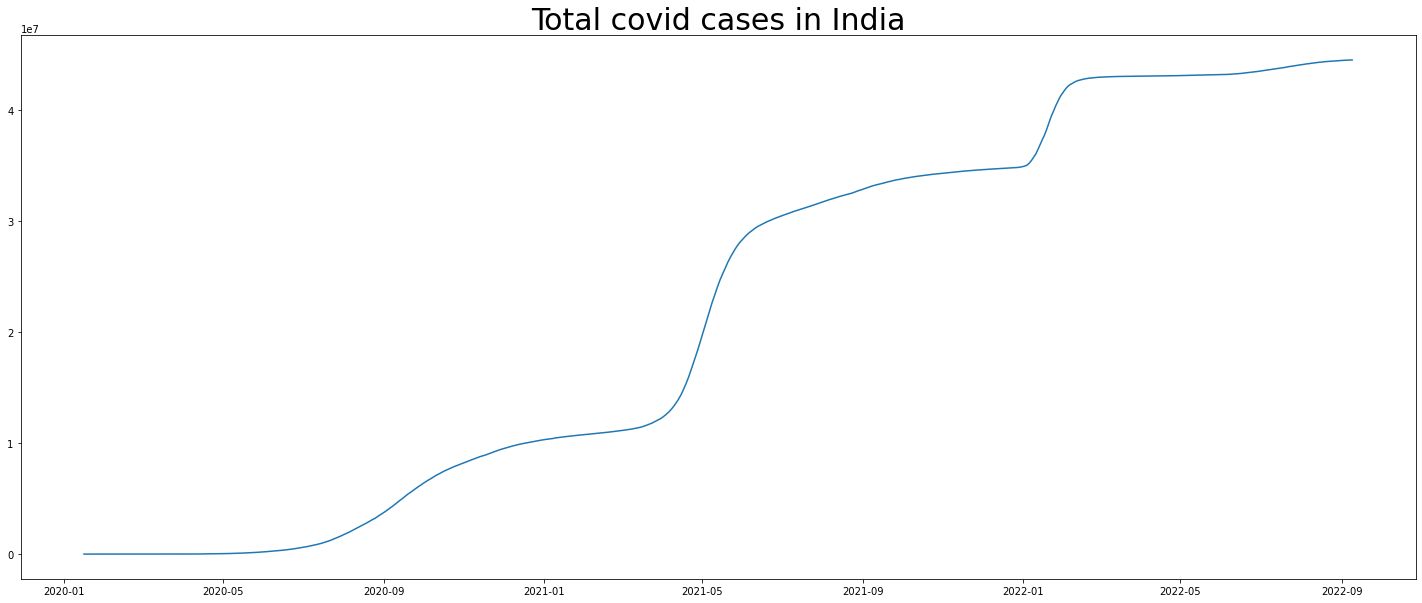

In [92]:
# Visualization new cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_cases']]);
plt.title(f'New covid cases in {country}', fontsize=30);

# Visualization total cases
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_cases']]);
plt.title(f'Total covid cases in {country}', fontsize=30);

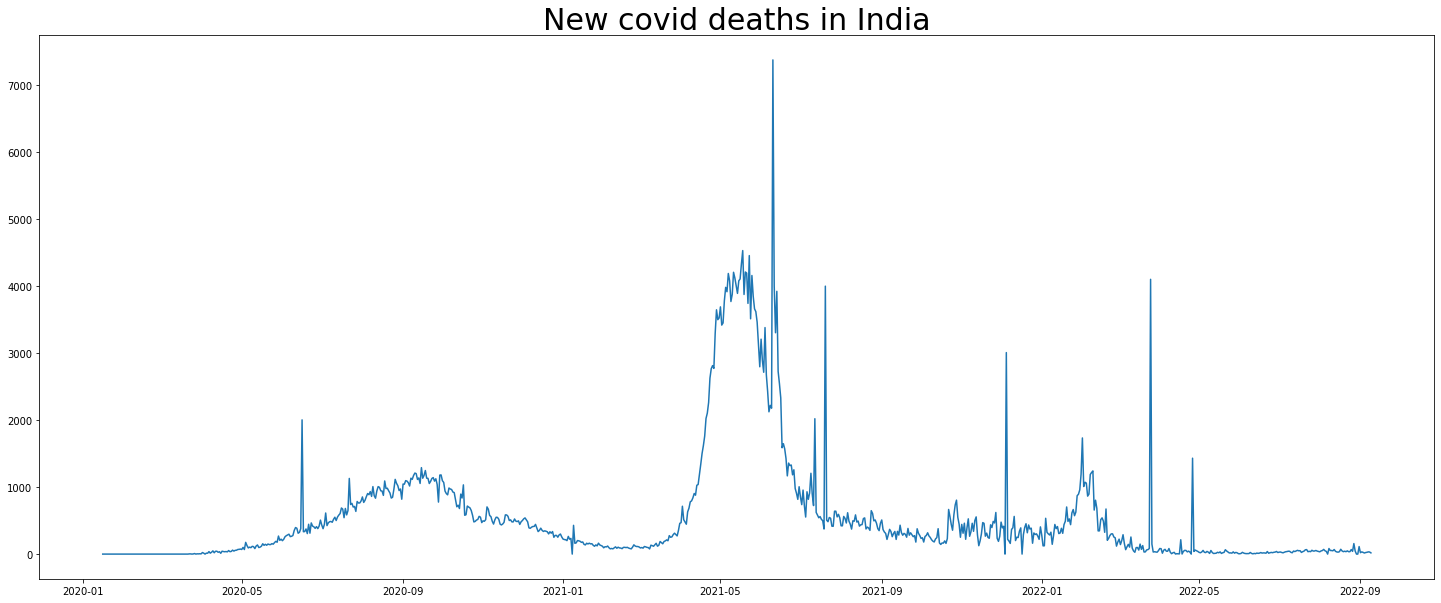

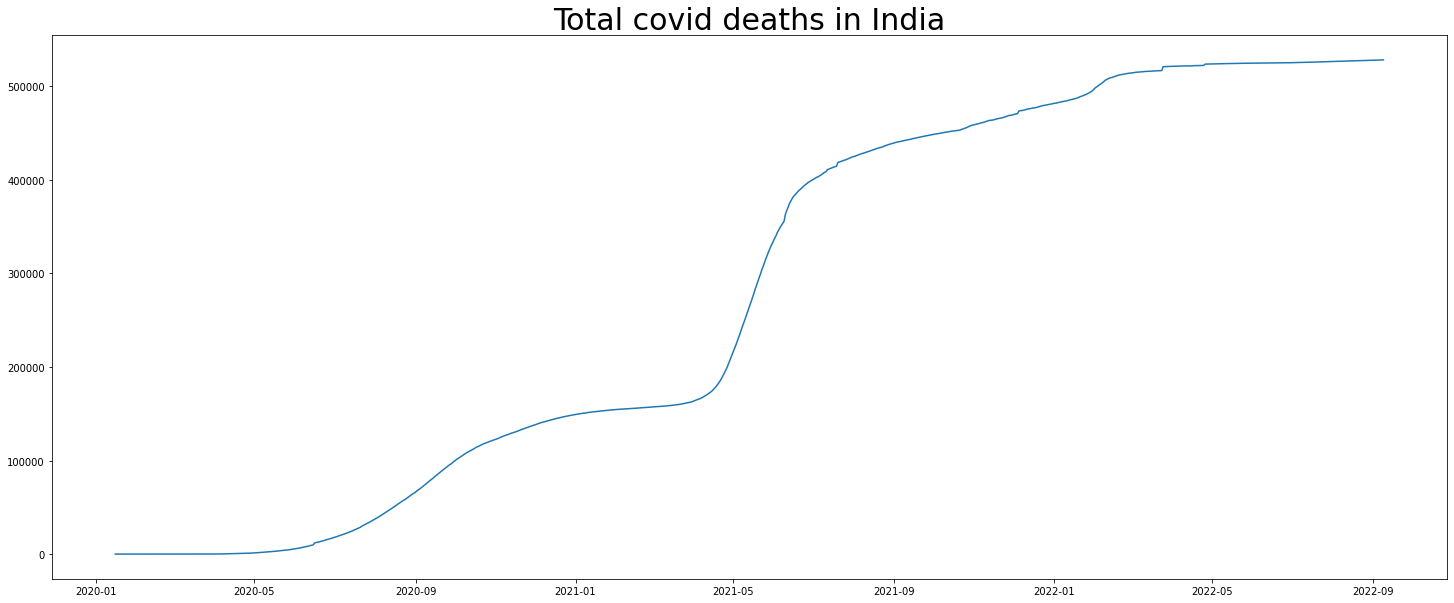

In [93]:
# Visualization new deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['new_deaths']]);
plt.title(f'New covid deaths in {country}', fontsize=30)

# Visualization total deaths
x = country_index['date']
img = plt.figure(figsize=(25,10))
plt.plot(x, country_index[['total_deaths']]);
plt.title(f'Total covid deaths in {country}', fontsize=30);

In [94]:

# from country_data import country_output

from sklearn.preprocessing import MinMaxScaler


def scaler(country):
    
    country_indicator = country_output(country)[1]
    
    X = country_indicator.drop(columns = ['date','new_cases', 'new_deaths', 'total_deaths'])
    
    y = country_indicator['new_deaths']
    
    scaler = MinMaxScaler()
    
    X_scaled = scaler.fit_transform(X)
    
    return X_scaled, y

def train_test_set(country, split_train=0.8, split_val=0):
    
    X, y = scaler(country)
    
    train = int((len(X)*split_train))
    val = int(len(X)*split_val)

    X_train = X[:train]
    y_train = y[:train]
    
    if split_val <= split_train:  
        X_test = X[train:]
        y_test = y[train:]
        return X_train, y_train, X_test, y_test
    
    X_val = X[train:val]
    y_val = y[train:val]

    X_test = X[val:]
    y_test = y[val:]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

In [95]:
df_deaths

country_name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Australia,Australia,Australia,...,United States,Uzbekistan,Venezuela,United States Virgin Islands,Vietnam,Vanuatu,Yemen,South Africa,Zambia,Zimbabwe
01Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
03Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
04Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Jan2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
07Sep2022,228.0,7785.0,1917.0,3584.0,155.0,2342.0,129769.0,14275.0,125.0,5026.0,...,1884.0,1637.0,5804.0,122.0,43125.0,14.0,2155.0,102129.0,4017.0,5596.0
08Sep2022,228.0,7786.0,1917.0,3584.0,155.0,2342.0,129769.0,14359.0,125.0,5046.0,...,1884.0,1637.0,5804.0,122.0,43126.0,14.0,2155.0,102129.0,4017.0,5596.0
09Sep2022,228.0,7786.0,1917.0,3584.0,155.0,2342.0,129769.0,14421.0,125.0,5046.0,...,1884.0,1637.0,5804.0,122.0,43126.0,14.0,2155.0,102129.0,4017.0,5596.0
10Sep2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
df_deaths_india = df_deaths['India']
df_deaths_india

01Jan2020         0.0
02Jan2020         0.0
03Jan2020         0.0
04Jan2020         0.0
05Jan2020         0.0
               ...   
07Sep2022    528090.0
08Sep2022    528121.0
09Sep2022    528139.0
10Sep2022         0.0
11Sep2022         0.0
Name: India, Length: 985, dtype: float64

In [97]:
# for idx,column in enumerate(df_deaths_india.columns):
#     print(idx,column)

In [98]:
# df_deaths_usa.columns[0]

In [99]:
# df_deaths_usa.iloc[:, [0]]

In [100]:
n_seq = 200 # ts_cases.shape[0] - 1 # nb of countries (samples)
n_obs = 15 # 15 days of training periiod (observations)
n_feat = df_deaths_india.shape # 1 # 1feature: covid deaths
n_pred = 1 # nb of days of prediction
n_feat, n_obs, n_seq

((985,), 15, 200)

In [101]:


def subsample_sequence(df_deaths_india, length):
    """
    Given the initial dataframe `df`, return a shorter dataframe sequence of length `length`.
    This shorter sequence should be selected at random.
    """
    
    last_possible = df_deaths_india.shape - length
    
    random_start = np.random.randint(0, last_possible)
    df_deaths_india_sample = df_deaths_india[random_start: random_start+length]
    
    return df_deaths_india_sample

def compute_means(X, df_deaths_india_mean):
    '''utils'''
    # Compute means of X
    means = X.mean()
    
    # Case if ALL values of at least one feature of X are NaN, then reaplace with the whole df_deaths_india_mean
    if means.isna().sum() != 0:
        means.fillna(df_deaths_india_mean, inplace=True)
        
    return means

def split_subsample_sequence(df_deaths_india, length, country_indicator_mean=None):
    """Return one single sample (Xi, yi) containing one sequence each of length `length`"""
    features_names = ['school_closing',	'workplace_closing',	'cancel_public_events',	'restrictions_on_gatherings',	'close_public_transport',	'stay_at_home_requirements',	'restrictions_on_internal_movement',	'international_travel_controls',	
    'income_support', 'debt/contract_relief', 'public_information_campaigns', 'testing_policy', 'contact_tracing'	,'facial_coverings',
    	'vaccination_policy',	'protection_of_elderly_people',	'total_cases',	'new_cases',	'total_deaths',	'new_deaths',	'people_vaccinated_per_hundred',	'people_fully_vaccinated_per_hundred',	'total_boosters_per_hundred']
    
    # Trick to save time during the recursive calls
    if country_indicator_mean is None:
        coutry_indicator_mean = country_indicator[features_names].mean()
        
    country_indicator_subsample = subsample_sequence(country_indicator, length).copy()
    df_deaths_india_subsample = subsample_sequence(df_deaths_india, length).copy()

    # Let's drop any row without a target! We need targets to fit our model
    # df_deaths_india_subsample.dropna(how='any', subset=[''], inplace=True)
    
    # Create y_sample
    if df_deaths_india_subsample.shape[0] == 0: # Case if there is no targets at all remaining
        return split_subsample_sequence(df_deaths_india, length, df_deaths_india_mean) # Redraw by recursive call until it's not the case anymore
    y_sample = df_deaths_india_subsample
    
    # Create X_sample
    X_sample = country_indicator_subsample[features_names]
    if X_sample.isna().sum().sum() !=0:  # Case X_sample has some NaNs
        X_sample = X_sample.fillna(compute_means(X_sample, country_indicator_mean))
        
    return np.array(X_sample), np.array(y_sample)

def get_X_y(country_indicator, df_deaths_india, sequence_lengths):
    '''Return a dataset (X, y)'''
    X, y = [], []

    for length in sequence_lengths:
        xi, yi = split_subsample_sequence(country_indicator, df_deaths_india, length)
        X.append(xi)
        y.append(yi)
        
    return X, y

In [104]:
# Here we define the parameter to generate our train/test sets
train_size = 1000
test_size = round(0.2 * train_size)

min_seq_len = 15
max_seq_len = 30

In [105]:
# Let's generate some train/test sets
sequence_lengths_train = np.random.randint(low=min_seq_len, high=max_seq_len, size=train_size)
# X_train, y_train = get_X_y(ts_cases_usa_train, sequence_lengths_train)
X_train, y_train = get_X_y(country_indicator, df_deaths_india, sequence_lengths_train)
sequence_lengths_test = np.random.randint(low=min_seq_len, high=max_seq_len, size=test_size)
# X_test, y_test = get_X_y(ts_cases_usa_test, sequence_lengths_test)
X_test, y_test = get_X_y(country_indicator, df_deaths_india, sequence_lengths_train)

# sequence_lengths_train = np.random.randint(low=min_seq_len, high=max_seq_len, size=train_size)
# X_train, y_train = get_X_y(ts_cases_usa_train, length)

# sequence_lengths_test = np.random.randint(low=min_seq_len, high=max_seq_len, size=test_size)
# X_test, y_test = get_X_y(ts_cases_usa_test, )

ValueError: operands could not be broadcast together with shapes (2,) (985,) 

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

X_train_pad = pad_sequences(X_train, value=-1000., dtype=float, padding='post', maxlen=30)
y_train_pad = pad_sequences(y_train, value=-1000., dtype=float, padding='post', maxlen=30)

X_test_pad = pad_sequences(X_test, value=-1000., dtype=float, padding='post', maxlen=30)
y_test_pad = pad_sequences(y_test, value=-1000., dtype=float, padding='post', maxlen=30)

X_train_pad.shape

In [ ]:
# Give validation set explicitly
history = model.fit(X_train_pad, y_train_pad,
          validation_data=(X_val, y_val), 
          batch_size=16,
          epochs=100)

In [ ]:
def init_model():
    
    model = models.Sequential()
    model.add(layers.Masking(mask_value=-1000., input_shape=(30,6)))
    model.add(layers.LSTM(20, return_sequences=True, activation='tanh'))
    model.add(layers.LSTM(10, return_sequences=True, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer='rmsprop', 
                  metrics=['accuracy'])
    model.compile(loss='mape', 
                  optimizer=RMSprop(learning_rate=0.0003), 
                  metrics=['mape'])
    
    
    return model

init_model().summary()

In [ ]:
# Evaluate performance returns [loss, metrics]
model.evaluate(scaler.transform(X_test), y_test)

In [ ]:
# First prediction
init_model.predict(scaler.transform(X_test))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = init_model()

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

history = model.fit(X_train_pad, y_train_pad,
            validation_set=0.1,
            epochs=1000, 
            batch_size=64,
            callbacks=[es], verbose=0)

In [ ]:
res = model.evaluate(X_test_pad, y_test_pad, verbose=1)

print(f'MAPE on the test set : {res[1]:.4f}, or {res[1]/bench_res:.2f} times the benchmark')

In [ ]:
def init_model_2():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.005)
    normalizer = Normalization()
    normalizer.adapt(X_train)
    
    model = models.Sequential()
    model.add(normalizer)
    model.add(layers.GRU(20, return_sequences=True, activation='tanh'))
    model.add(layers.GRU(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics='mape')
    
    return model

model_2 = init_model_2()

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5, restore_best_weights=True)

history_2 = model_2.fit(X_train, y_train,
            validation_set=0.1,
            epochs=1000, 
            batch_size=32,
            callbacks=[es], verbose=0)